 # Algoritmos de clasificación NO supervisada
Un algoritmo de agrupamiento (en inglés, clustering) es un procedimiento de agrupación de una serie de vectores de acuerdo con un criterio. Esos criterios son por lo general distancia o similitud. La cercanía se define en términos de una determinada función de distancia, como la euclídea, aunque existen otras más robustas o que permiten extenderla a variables discretas. La medida más utilizada para medir la similitud entre los casos es la matriz de correlación entre los nxn casos. Sin embargo, también existen muchos algoritmos que se basan en la maximización de una propiedad estadística llamada verosimilitud.

## Análisis del Problema
El conjunto de datos corresponde a las ventas de un almacén de ventas al por mayor. Analizar el patrón de compras de sus clientes, le permitiría al negocio segmentar sus clientes y preparar promociones o eventos especiales para cada grupo de clientes. 

La ventaja que obtendría el negocio al hacer algo así puede verse reflejada en un incremente en las ventas de los productos que caracterizan a cada uno de los clientes. Asimismo, el negocio podría planear mejor la forma en que distribuye su producto, pues si se encuentra un patrón de consumo alto de un producto que es bajo en las otras zonas o grupos, se puede tomar la decisión de enviar mayores cantidades de ese producto a donde hay mayor consumo.


![Autos ROC](img/compras.jpg)

## Entendimiento de los Datos

El conjunto de datos contiene las siguientes variables:

- Channel: canal de venta (1 = Horeca - 298 observaciones, 2 = Retail  - 142 observaciones).
- Region: región en la cual se hizo la venta (1 = Lisboa - 77 observaciones, 2 = Oporto - 47 observaciones, 3 = Otra Regióon - 316 observaciones).
- Fresh: cantidad de dinero en producto fresco.
- Grocery: cantidad de dinero en comestibles.
- Frozen: cantidad de dinero en alimento congelado.
- Detergents_Paper: cantidad de dinero en detergente.
- Delicassen: cantidad de dinero en delicatessen.

## Exploración de los Datos

In [5]:
#Evitar mostrar warning messages
options(warn=-1)
#librerías utilizadas
library(lattice)
library(reshape2)
library(ggplot2)
library(qcc)

In [6]:
#cargue el archivo a una variable que se llame ventas usando la función read.csv
ventas <- read.csv('ventas.csv')

#sobreescriban las columnas Region y Channel con el factor de esa columna
ventas$Channel <- factor(ventas$Channel)
ventas$Region <- factor(ventas$Region)

#Utilice la función str() para ver la estructura del conjunto de datos:
str(ventas)

'data.frame':	440 obs. of  8 variables:
 $ Channel         : Factor w/ 2 levels "1","2": 2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


La mayoría de las ventas se registraron en la región #3 (otra región), mientras que la mayoría de las  ventas se hicieron por medio del canal # 1 (Horeca), tal como se puede apreciar en los siguientes gráficos:

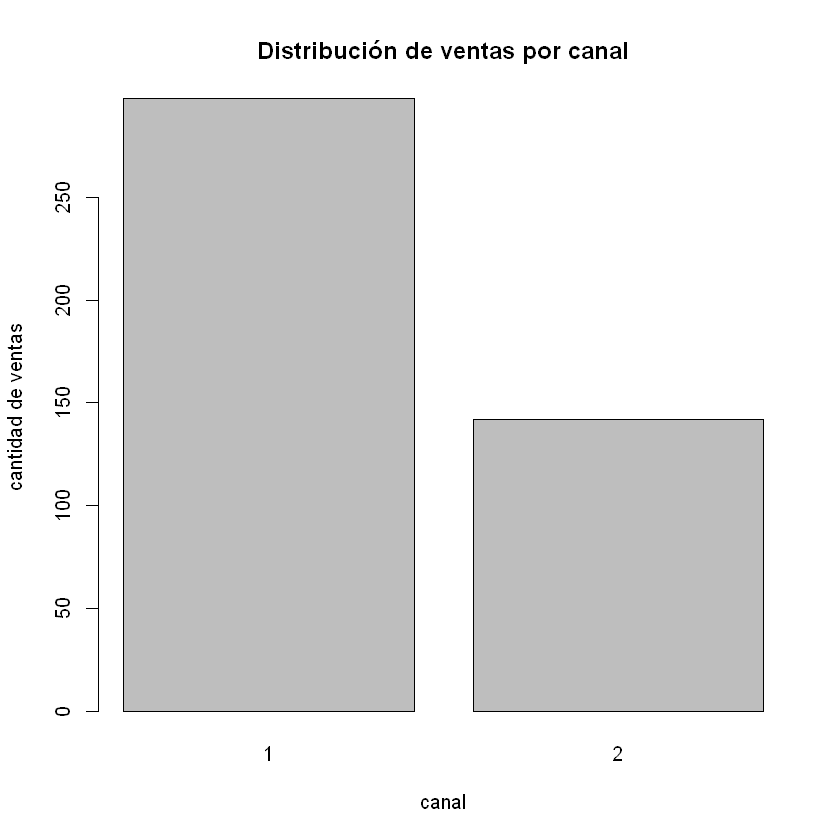

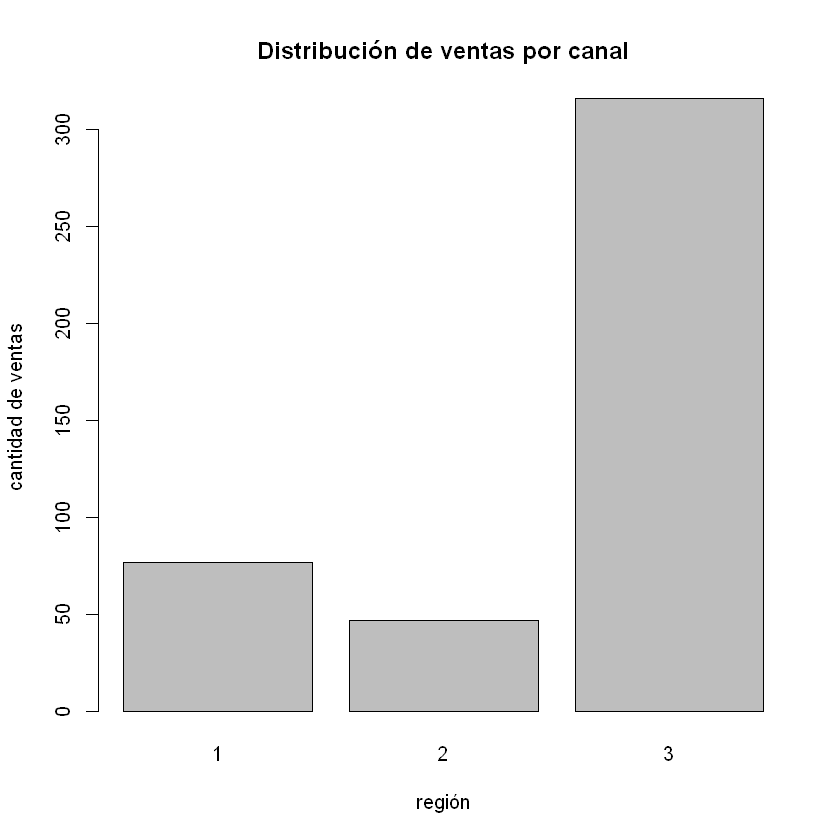

In [7]:
barplot(table(ventas$Channel),
        main = 'Distribución de ventas por canal',
        xlab = 'canal',
        ylab = 'cantidad de ventas')

barplot(table(ventas$Region),
        main = 'Distribución de ventas por canal',
        xlab = 'región',
        ylab = 'cantidad de ventas')

Using Channel, Region as id variables


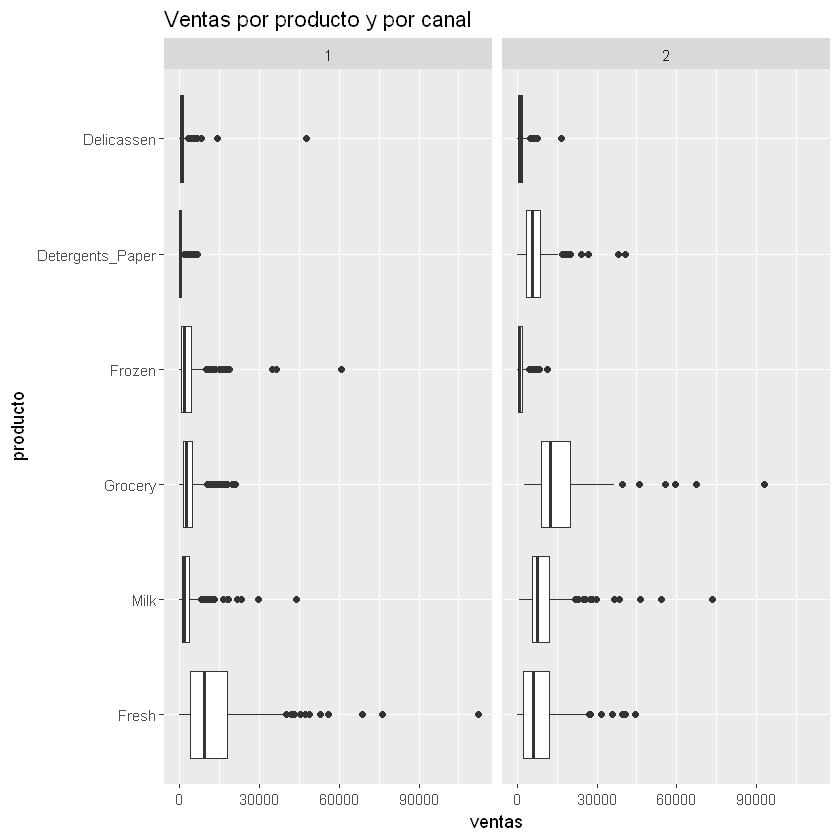

In [8]:
bxplt <- ggplot(data = melt(ventas), aes(x= variable, y = value))
bxplt <- bxplt + geom_boxplot()
bxplt <- bxplt + facet_wrap(~Channel)
bxplt <- bxplt + coord_flip()
bxplt <- bxplt + labs(x = 'producto', y  = 'ventas')
bxplt <- bxplt + ggtitle('Ventas por producto y por canal')
bxplt

## Modelo de Minería de Datos

Para agrupar a los clientes con base al consumo, vamos a utilizar solo las variables Fresh, Milk, Grocery, Frozen, Detergents_Paper y Delicassen. En este caso, vamos a intentar agrupar los clientes en 5 grupos diferentes.

In [9]:
modelo.agrupacion <- kmeans(ventas[,c(3:8)], centers = 5)

In [10]:
#predecir utilizando el modelo para agregar una variable nueva llamada 'cluster' al conjunto de datos
ventas$cluster <- modelo.agrupacion$cluster

#convertir la variable nueva a un factor
ventas$cluster <- factor(ventas$cluster)


## Evaluación

Al hacer un análisis de pareto sobre los grupos creados, se puede apreciar que los grupos #2 y #3 son los que tienen mayor cantidad de clientes asignados: en ellos se agrupa el 74.32%

Estos grupos grandes pueden representar al consumidor promedio, aquellos que no muestran patrones significativamente diferentes a los otros clientes.

   
Pareto chart analysis for table(ventas$cluster)
     Frequency  Cum.Freq. Percentage Cum.Percent.
  1 208.000000 208.000000  47.272727    47.272727
  3 130.000000 338.000000  29.545455    76.818182
  2  49.000000 387.000000  11.136364    87.954545
  5  47.000000 434.000000  10.681818    98.636364
  4   6.000000 440.000000   1.363636   100.000000

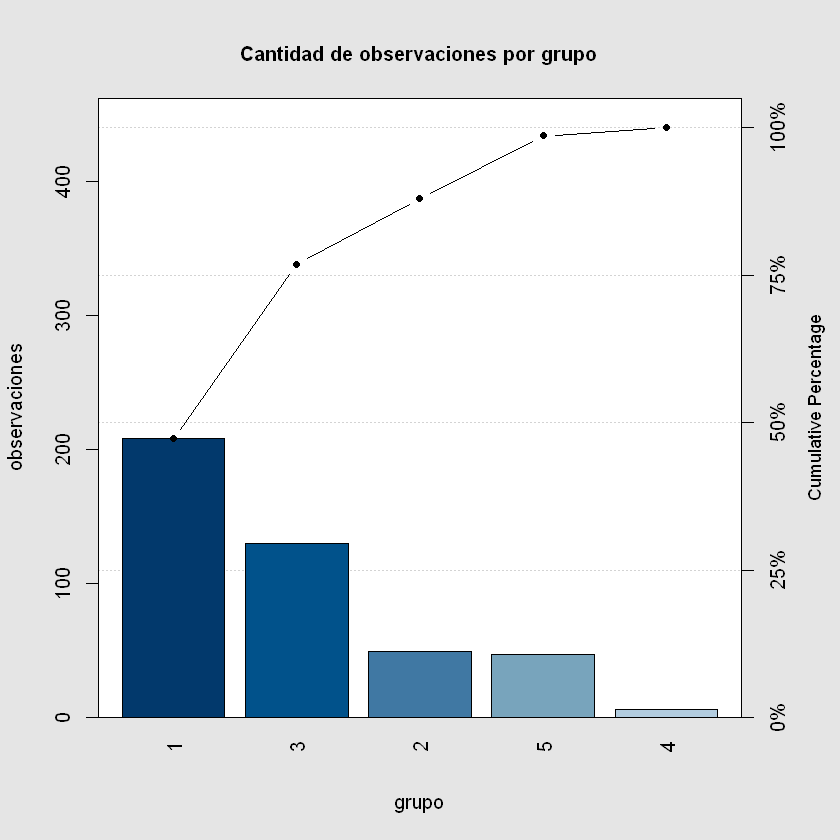

In [11]:
pareto.chart(table(ventas$cluster),
             main = 'Cantidad de observaciones por grupo',
             xlab = 'grupo',
             ylab = 'observaciones')

In [13]:
by(ventas, ventas$cluster, summary)

ventas$cluster: 1
 Channel Region      Fresh            Milk          Grocery     
 1:144   1: 39   Min.   :    3   Min.   :   55   Min.   :  137  
 2: 64   2: 20   1st Qu.: 1704   1st Qu.: 1480   1st Qu.: 2099  
         3:149   Median : 3470   Median : 3612   Median : 4646  
                 Mean   : 4207   Mean   : 4410   Mean   : 5967  
                 3rd Qu.: 6664   3rd Qu.: 6451   3rd Qu.: 9580  
                 Max.   :11594   Max.   :18664   Max.   :22272  
     Frozen        Detergents_Paper    Delicassen     cluster
 Min.   :   25.0   Min.   :    5.0   Min.   :   3.0   1:208  
 1st Qu.:  486.2   1st Qu.:  263.8   1st Qu.: 303.0   2:  0  
 Median : 1073.0   Median :  951.5   Median : 745.5   3:  0  
 Mean   : 2056.2   Mean   : 2227.7   Mean   :1081.7   4:  0  
 3rd Qu.: 2421.5   3rd Qu.: 3922.0   3rd Qu.:1470.0   5:  0  
 Max.   :17866.0   Max.   :10069.0   Max.   :7844.0          
------------------------------------------------------------ 
ventas$cluster: 2
 Channel Regi

Las principales características de cada grupo son:

Grupo #1: (2do grupo más pequeño)

- Principalmente observaciones de la región 3 y el canal 1.
- Muy alto consumo de productos frescos.
- Bajo consumo de leche.
- Bajo consumo de comestibles.
- Alto consumo de alimentos congelados.
- Bajo consumo de detergentes.
- Bajo consumo de delicassen.

Grupo #2: (2do grupo más grande)

- Observaciones principalmente del canal 1 y la región 3.
- Alto consumo de productos frescos.
- Bajo consumo de leche.
- Bajo consumo de comestibles.
- Bajo consumo de alimentos congelados.
- Bajo consumo de detergentes.
- Bajo consumo de delicassen.

Grupo #3: (grupo más grande)

- Observaciones principalmente del canal 1 y la región 3.
- Bajo consumo de productos frescos.
- Bajo consumo de leche.
- Muy bajo consumo de comestibles.
- Muy bajo consumo de alimentos congelados.
- Bajo consumo de detergentes.
- Muy bajo consumo de delicassen.

Grupo #4: (grupo más pequeño)

- Observaciones principalmente del canal 2 y la región 3.
- Alto consumo de productos frescos.
- Muy alto consumo de leche.
- Muy alto consumo de comestibles.
- Alto consumo de alimentos congelados.
- Muy alto consumo de detergentes.
- Muy alto consumo de delicassen.

Grupo #5:

- Observaciones principalmente del canal 2 y la región 3.
- Muy bajo consumo de productos frescos.
- Alto consumo de leche.
- Alto consumo de comestibles.
- Muy bajo consumo de alimentos congelados.
- Alto consumo de detergentes.
- Bajo consumo de delicassen.

In [14]:
ventas

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,3,12669,9656,7561,214,2674,1338,3
2,3,7057,9810,9568,1762,3293,1776,1
2,3,6353,8808,7684,2405,3516,7844,1
1,3,13265,1196,4221,6404,507,1788,3
2,3,22615,5410,7198,3915,1777,5185,3
2,3,9413,8259,5126,666,1795,1451,1
2,3,12126,3199,6975,480,3140,545,3
2,3,7579,4956,9426,1669,3321,2566,1
1,3,5963,3648,6192,425,1716,750,1
